# **The famous Titanic dataset**

### **Columns of the dataset**
PassengerId: Passenger number <br>
Survived: 0 = Dead 1 = Alive <br>
Pclass: 1 = First class 2 = Second class 3 = Third class <br>
Name: Name of passenger <br>
Sex: Gender <br>
Age:Age of passenger <br>
SibSp: Number of siblings Aboard <br>
parch - Number of Parents/Children Aboard <br>
ticket - Ticket Number <br>
fare - Passenger Fare <br>
cabin - Cabin <br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) <br>

#### **Importing required librarries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from IPython.display import Image

In [ ]:
# Reading file
df = pd.read_csv('titanic_dataset.csv')

In [ ]:
# describing data features
df.describe(include='all') 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
print('The number of samples in the data is {}.'.format(df.shape[0]))


The number of samples in the data is 891.


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Quality & Missing Value Assessment


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### percent of missing "Age" 

In [ ]:
print('Percent of missing "Age" records is %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Percent of missing "Age" records is 19.87%


20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

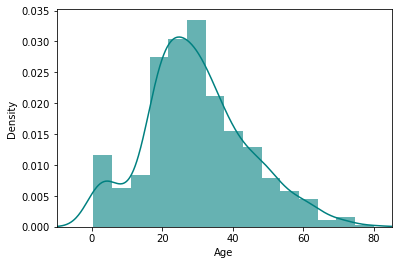

In [ ]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [ ]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


#### percent of missing "Cabin" 

In [ ]:
print('Percent of missing "Cabin" records is %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

#### percent of missing "Embarked" 

In [ ]:
print('Percent of missing "Embarked" records is %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


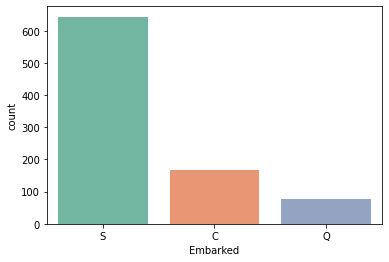

In [ ]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

## Feature engineering

#### Missing value imputation

In [ ]:
df_data = df.copy()
median_imputer = SimpleImputer(strategy='median')
df_data['Age']=median_imputer.fit_transform(df_data[["Age"]])

In [ ]:
# df_data = df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent') #Mode imputation
df_data['Embarked']=mode_imputer.fit_transform(df_data[["Embarked"]])

In [ ]:
df_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### According to the data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity),Lets combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.


In [ ]:

## Create categorical variable for traveling alone
df_data['TravelAlone']=np.where((df_data["SibSp"]+df_data["Parch"])>0, 0, 1)
df_data.drop('SibSp', axis=1, inplace=True)
df_data.drop('Parch', axis=1, inplace=True)


Let's also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked").

In [ ]:
df_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,0


In [ ]:
#create categorical variables and drop some variables
df_data=pd.get_dummies(df_data, columns=["Pclass","Embarked","Sex"])
df_data.drop('Sex_female', axis=1, inplace=True)
df_data.drop('PassengerId', axis=1, inplace=True)
df_data.drop('Name', axis=1, inplace=True)
df_data.drop('Ticket', axis=1, inplace=True)

In [ ]:
df_data.head(1)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.25,0,0,0,1,0,0,1,1


In [ ]:
df_data.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

##  Exploratory Data Analysis

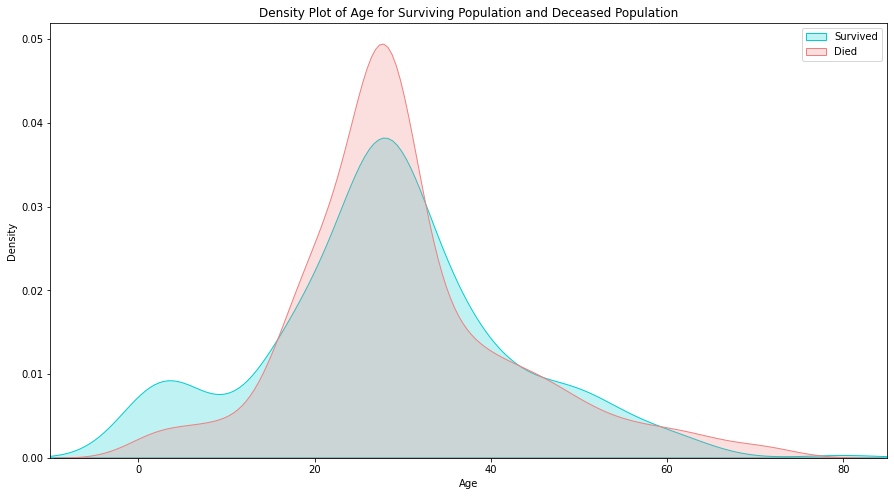

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_data["Age"][df_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_data["Age"][df_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

#### Let us see if age has any significant role to play in the survival

In [ ]:
plt.figure(figsize=(20,8))
avg_survival_byage = df_data.groupby(['Age'])['Survived'].mean().reset_index()
avg_survival_byage

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


<Figure size 1440x576 with 0 Axes>

In [ ]:
avg_survival_byage.head(10)

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


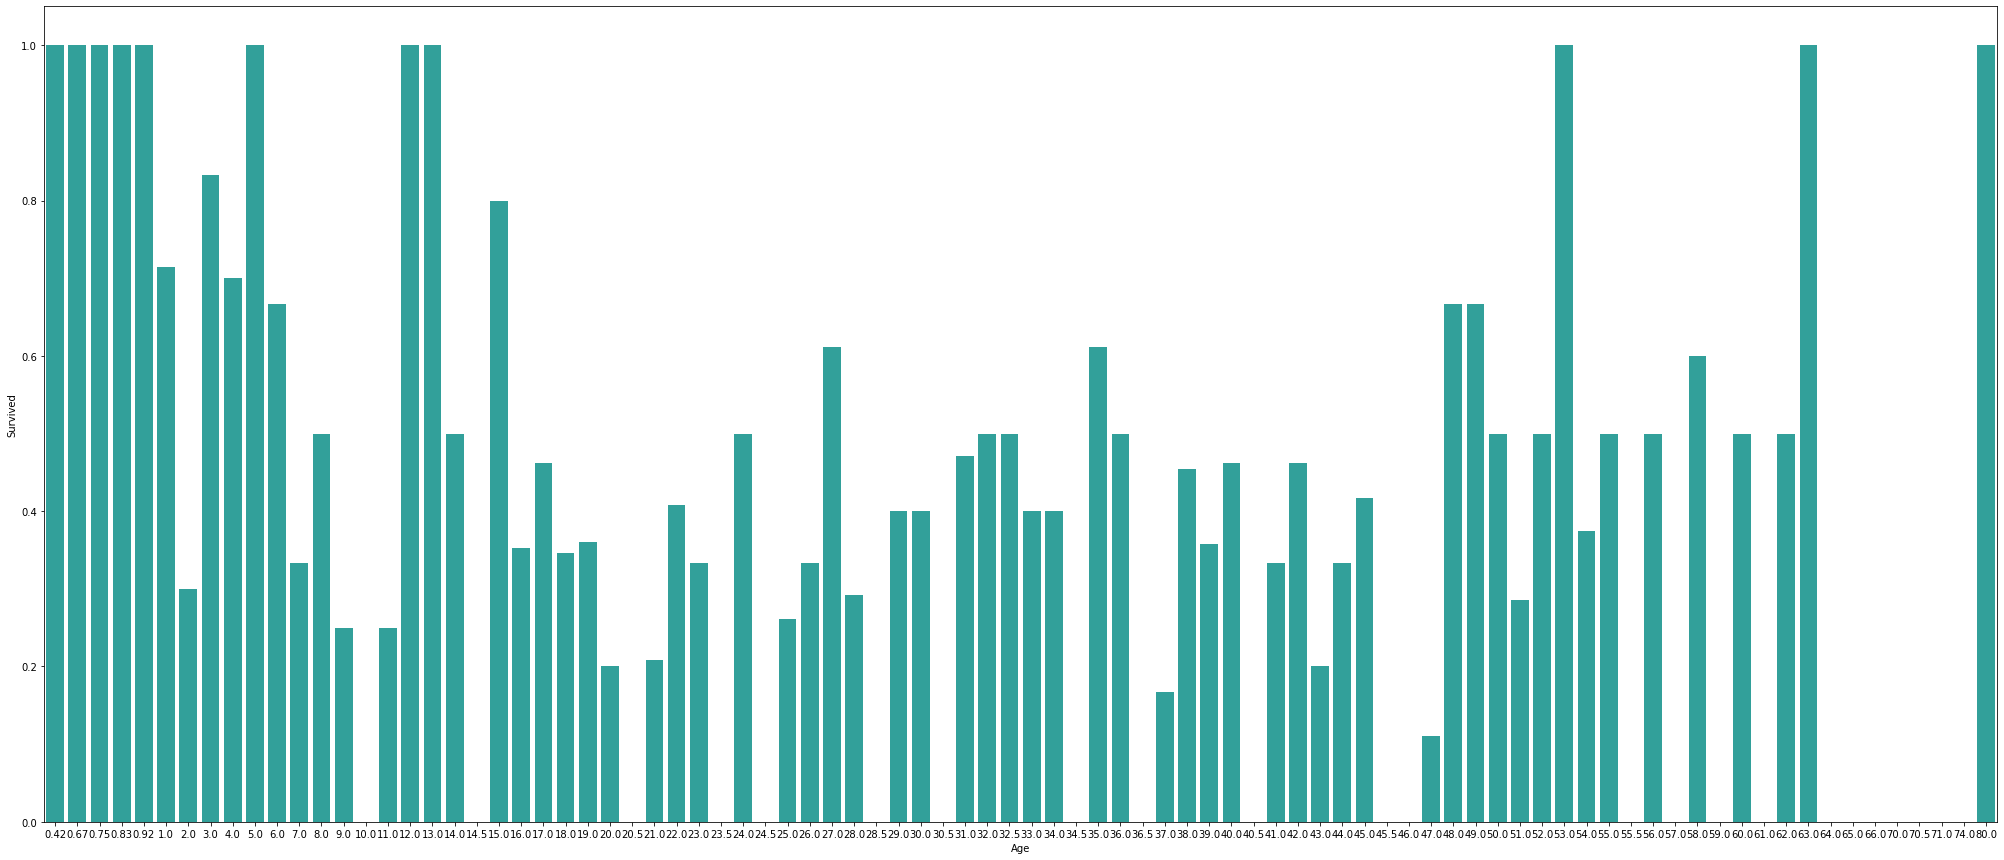

In [ ]:
plt.figure(figsize=(35, 15))
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

# plt.show()

Considering the survival rate of passengers under 16, Let's also include another categorical variable in my dataset: "Minor"

In [ ]:
df_data['IsMinor']=np.where(df_data['Age']<=16, 1, 0)

### Exploration of Fare

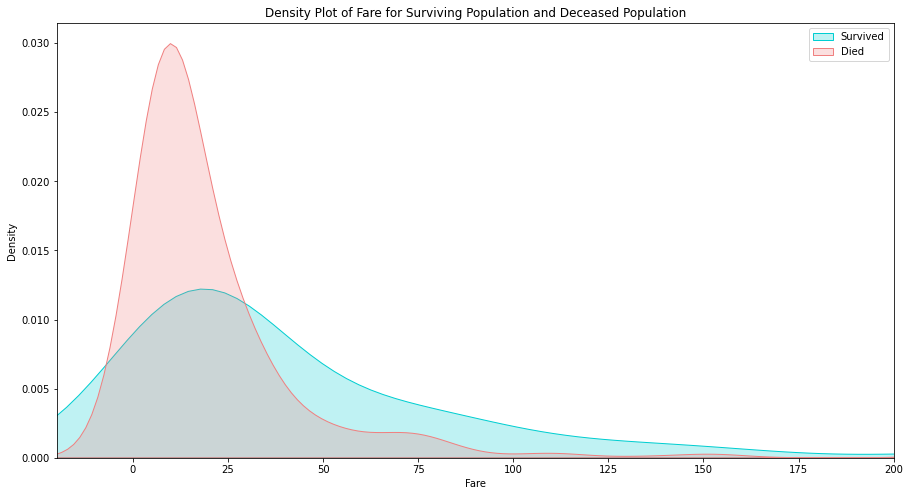

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_data["Fare"][df_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_data["Fare"][df_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class.

### Exploration of travelling alone variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


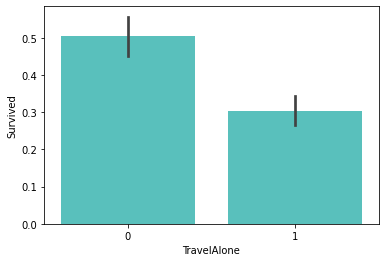

In [ ]:
sns.barplot('TravelAlone', 'Survived', data=df_data, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

### Exploration of Gender Variable¶

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


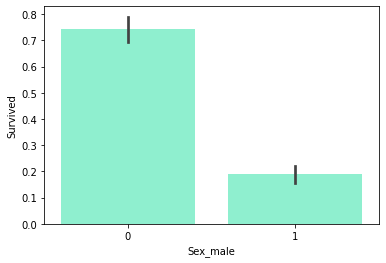

In [ ]:
sns.barplot('Sex_male', 'Survived', data=df_data, color="aquamarine")
plt.show()

This is a very obvious and significant difference. Clearly being female greatly increased the chances of survival.

#### Correlation analysis for numerical variables

In [ ]:
df_data[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


### Logistic Regression and Results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, log_loss

In [ ]:
X = df_data.drop(['Survived'],axis=1,inplace=False)
y = df_data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.head(2)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
30,40.0,27.7208,1,1,0,0,1,0,0,1,0
10,4.0,16.7000,0,0,0,1,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Age','Fare']] = sc.fit_transform(X_train.iloc[:, 0:2])
X_test[['Age','Fare']] = sc.transform(X_test.iloc[:, 0:2])

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

 accuracy is 0.777


In [ ]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

### checking performance of model using various matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

In [ ]:
len(y_test)

179

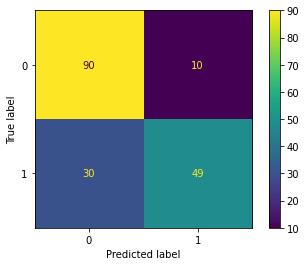

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
plt.show()

**Precision** Precision quantifies the number of positive class predictions that actually belong to the positive class. <br>
**Recall** Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.<br>
**F1-score** F1-score provides a single score that balances both the concerns of precision and recall in one number.<br>


In [ ]:
prec= 49/(49+10)

In [ ]:
rec= 49/(30+49)

In [ ]:
prec, rec

(0.8305084745762712, 0.620253164556962)

Quick Question.: Cancer prediction <br>
Quick Question.: Email classification

In [ ]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.83      0.62      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179

